# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

%matplotlib inline
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')

## 1. 분석의 목적과 변수 확인

In [3]:
titanic_df.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [5]:
titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.corr() # 상관계수 확인
# 상관성과 인과성 구분하기

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
titanic_df.isnull().sum() # 결측치 확인
# age, cabin, embarked에서 결측치 발견

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [8]:
# 생존자, 사망자는 몇 명이나 있을까?
titanic_df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

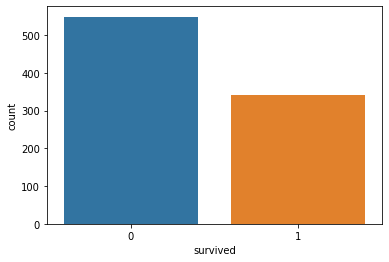

In [9]:
# 생존자, 사망자 수를 barplot으로 시각화
sns.countplot(x='survived', data=titanic_df)
plt.show()

In [10]:
titanic_df[['pclass', 'survived']].groupby(['pclass']).count()

,survived
pclass,
1,216
2,184
3,491


In [11]:
titanic_df[['pclass', 'survived']].groupby(['pclass']).sum()

,survived
pclass,
1,136
2,87
3,119


In [12]:
titanic_df[['pclass', 'survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


[]

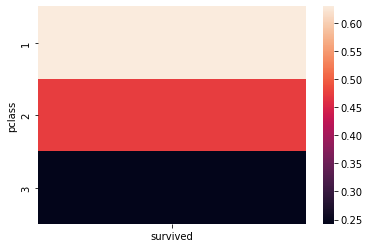

In [13]:
sns.heatmap(titanic_df[['pclass', 'survived']].groupby(['pclass']).mean())
plt.plot()

In [14]:
titanic_df.groupby(['survived', 'sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

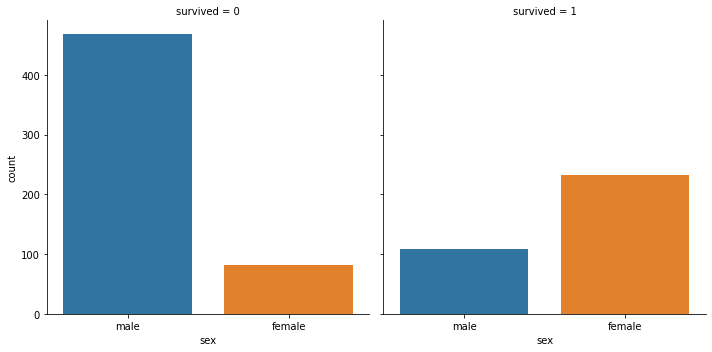

In [15]:
sns.catplot(x='sex', col='survived', kind='count', data=titanic_df)
plt.show()

In [16]:
titanic_df.describe()['age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

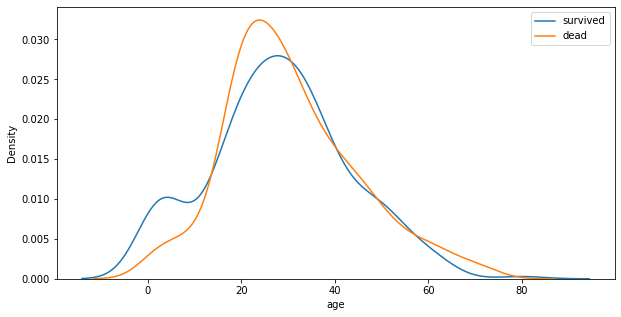

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.survived == 1]['age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.survived == 0]['age'], ax=ax)
plt.legend(['survived', 'dead'])
plt.show()

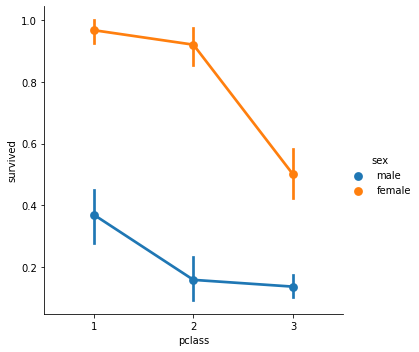

In [18]:
sns.catplot(x='pclass', y='survived', hue='sex', kind='point', data=titanic_df)
plt.show()

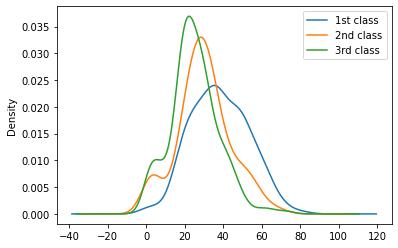

In [19]:
titanic_df['age'][titanic_df.pclass == 1].plot(kind='kde')
titanic_df['age'][titanic_df.pclass == 2].plot(kind='kde')
titanic_df['age'][titanic_df.pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()